### Lab 7: Integration (1)

In this lab we will investigate numerical integration methods. We’ll start with the simple trapezoid and Simpson’s rules, with which you may be familiar from your maths study, and move on to the more sophisticated *Gaussian quadrature*.

Recall that our general rule for numerical integration is
$$
\int_a^b f(x)\,\mathrm{d}x \approx (b-a)\sum_{i=1}^N w_if(x_i)
$$
for suitable weights $w_i$ and places $x_i$ to evaluate the function. For the trapezoid and Simpson's rule calculations, the $x_i$ must be evenly spaced; we'll denote the spacing between them by $h$. Then the input to our python function will be a numpy array `d` containing $f(x_i)$. We will need to calculate a suitable weighting array `w` containing the $w_i$ values. Since array multiplication is componentwise, we can then simply calculate `d*w`. The sum is easily evaluated using the Python built-in `sum` function.

For the trapezoid rule, the weights array should be
$$
w = \tfrac1N\times(\tfrac12, 1, 1, \dots, 1, \tfrac12).
$$
Rewriting the integral in a more convenient form, we have
$$
\int_a^b f(x)\,\mathrm{d}x \approx h\sum_{i=1}^N v_if(x_i)
$$
with
$$
v = (\tfrac12, 1, 1, \dots, 1, \tfrac12).
$$

**Write a Python function `trapezoid(d, h)` that returns the estimated integral over the points `d` (in the notation above), using the trapezoid rule.**

In [4]:
%matplotlib notebook 

from numpy import array, linspace, logspace, cos, pi, exp, sqrt, ones, vectorize

In [11]:
def trapezoid(d, h):
    """Integrate d using the trapezoid rule.
    
    d: array of data points evaluated at even spacing h
    h: spacing between data points"""
    I = 0
    v=np.ones(len(d))
    v[0]=1/2
    v[-1]=1/2
    return h*sum(d*v)

In [29]:
a = np.ones(100)
n = len(a)-2

np.array([0.5] +[1]*(n) +[0.5])



array([ 0.5,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
        1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
        1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
        1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
        1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
        1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
        1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
        1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
        1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
        0.5])

In [50]:
def trapezoid(x,y):
    """Integrate d using the trapezoid rule.
    d: array of data points evaluated at even spacing h"""
    I = 0
    v=ones(len(x))
    v[0]=1/2
    v[-1]=1/2
    hh = ones(len(x)+1)    # array of spacing between data points
    
    for i in range(1,len(x)):
        h = x[i]-x[i-1]
        hh[i] = h
        
    return sum(h*y*v)

To test your function, we’ll calculate $\int_0^{\pi/2}\cos(x)\,\mathrm{d}x = 1$.

In [51]:
x = linspace(0, pi/2, 100)
y = cos(x)
print(trapezoid(x,y))

0.999979020751


SyntaxError: invalid syntax (<ipython-input-22-db61e8969208>, line 1)

In [4]:
def quizf(x):
    return (x**2) /(1+x**4)

In [44]:
#Trapezoid for cos(x)

print("{:^10} {:^10}".format("Step", "Error"))
hh=logspace(1,7,7)
trap_errors=[]
for h in hh:
    x = linspace(0, pi/2, int(h)+1)
    integral = trapezoid(cos(x),x[1]-x[0])
    trap_error=abs(1-integral)
    trap_errors.append(trap_error)
    print("{:^10.3e} {:^10.6e}".format(x[1]-x[0],trap_error))

   Step      Error   


TypeError: trapezoid() takes 1 positional argument but 2 were given

Assuming that the answer you got above was close to 1, **write a loop to repeat the same calculation with the number $N$ of steps varying from $10$ to $10^7$. Report the error for each step size.**

*Hint:* remember that `logspace` from the `pylab` (or `numpy`) module is an easy way of calculating a range of values that increase (or decrease) by a constant factor. If you’re not sure how to use this, try evaluating `logspace(1, 7, 7)`.

▶ **CHECKPOINT 1**

In [6]:
x = linspace(0, pi/2, 100)
y = cos(x)

For Simpson’s rule, on the other hand, the weights array should be
$$
v = \tfrac13\times(1, 4, 2, 4, 2, \dots, 4, 2, 4, 1).
$$

**Write a Python function `simpson(d, h)` that works in the same way to calculate an integral using Simpson’s rule.**

In [7]:
def simpson(d,h):   
    v=array([1]+[4,2]*((len(array(d))-3)//2)+[4,1])/3
    return h*sum(d*v)

**Repeat the loop from above, again reporting the error at each step size.** Is Simpson’s rule better or worse than the trapezoid rule in evaluating this integral?

In [8]:
print("{:^10} {:^10}".format("Step", "Error"))
hh=logspace(1,7,7)
sim_errors=[]
for h in hh:
    x = linspace(0, pi/2, int(h)+1)
    intSimpson=simpson(cos(x),x[1]-x[0])
    sim_error = abs(1- intSimpson)
    sim_errors.append(sim_error)
    print("{:^10.3e} {:^10.6e}".format(x[1]-x[0],sim_error))

   Step      Error   
1.571e-01  3.392221e-06
1.571e-02  3.382359e-10
1.571e-03  3.197442e-14
1.571e-04  9.992007e-16
1.571e-05  8.881784e-16
1.571e-06  2.620126e-14
1.571e-07  6.417089e-14


In the same way as we did for the differentiation algorithms, **plot on the same log-log axes the error against the step size for these two algorithms.** Comment on the shape of these graphs.

<IPython.core.display.Javascript object>


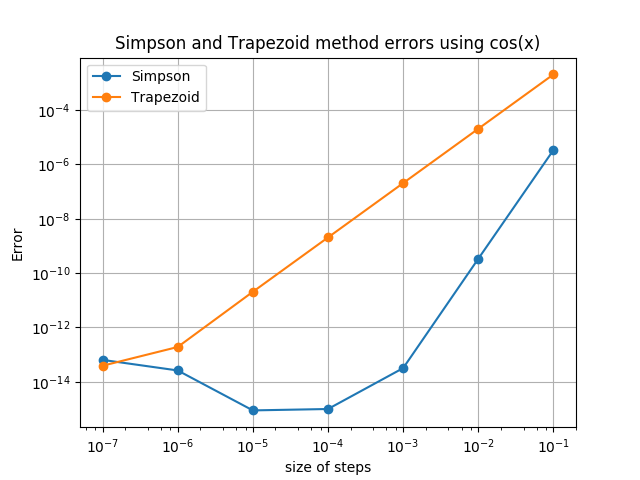

In [19]:
%matplotlib notebook
from pylab import loglog, xlabel, ylabel, title, legend, figure,grid
figure()
loglog(1/hh, sim_errors, 'o-', label="Simpson")
loglog(1/hh, trap_errors, 'o-', label="Trapezoid")

title("Simpson and Trapezoid method errors using cos(x)")
xlabel("size of steps")
ylabel("Error")
grid()
legend()

**Repeat the same calculations** (*i.e.*, calculate the error for a range of step sizes) **for the integral**
$$
\int_0^1 \exp(-x)\,\mathrm{d}x = 1 - e^{-1}.
$$
Are your results consistent with the cosine integral from the previous part? **Make a similar figure.**

In [1]:
print("{:^10} {:^10}".format("Step", "Error"))
hh=logspace(1,7,7)
sim_errors2=[]
for h in hh:
    x = linspace(0,1, h+1)
    intSimpson=simpson(exp(-x),x[1]-x[0])
    sim_error2 = abs(1-exp(-1) - intSimpson)
    sim_errors2.append(sim_error2)
    print("{:^10.3e} {:^10.6e}".format(x[1]-x[0],sim_error2))

   Step      Error   


NameError: name 'logspace' is not defined

In [8]:
import numpy as np
np.linspace(0,np.pi/2,100)
d =array
len(d)

array([ 0.        ,  0.01586663,  0.03173326,  0.04759989,  0.06346652,
        0.07933315,  0.09519978,  0.11106641,  0.12693304,  0.14279967,
        0.1586663 ,  0.17453293,  0.19039955,  0.20626618,  0.22213281,
        0.23799944,  0.25386607,  0.2697327 ,  0.28559933,  0.30146596,
        0.31733259,  0.33319922,  0.34906585,  0.36493248,  0.38079911,
        0.39666574,  0.41253237,  0.428399  ,  0.44426563,  0.46013226,
        0.47599889,  0.49186552,  0.50773215,  0.52359878,  0.53946541,
        0.55533203,  0.57119866,  0.58706529,  0.60293192,  0.61879855,
        0.63466518,  0.65053181,  0.66639844,  0.68226507,  0.6981317 ,
        0.71399833,  0.72986496,  0.74573159,  0.76159822,  0.77746485,
        0.79333148,  0.80919811,  0.82506474,  0.84093137,  0.856798  ,
        0.87266463,  0.88853126,  0.90439789,  0.92026451,  0.93613114,
        0.95199777,  0.9678644 ,  0.98373103,  0.99959766,  1.01546429,
        1.03133092,  1.04719755,  1.06306418,  1.07893081,  1.09

In [10]:
np.cos(x)

array([  1.00000000e+00,   9.99874128e-01,   9.99496542e-01,
         9.98867339e-01,   9.97986676e-01,   9.96854776e-01,
         9.95471923e-01,   9.93838464e-01,   9.91954813e-01,
         9.89821442e-01,   9.87438889e-01,   9.84807753e-01,
         9.81928697e-01,   9.78802446e-01,   9.75429787e-01,
         9.71811568e-01,   9.67948701e-01,   9.63842159e-01,
         9.59492974e-01,   9.54902241e-01,   9.50071118e-01,
         9.45000819e-01,   9.39692621e-01,   9.34147860e-01,
         9.28367933e-01,   9.22354294e-01,   9.16108457e-01,
         9.09631995e-01,   9.02926538e-01,   8.95993774e-01,
         8.88835449e-01,   8.81453363e-01,   8.73849377e-01,
         8.66025404e-01,   8.57983413e-01,   8.49725430e-01,
         8.41253533e-01,   8.32569855e-01,   8.23676581e-01,
         8.14575952e-01,   8.05270258e-01,   7.95761841e-01,
         7.86053095e-01,   7.76146464e-01,   7.66044443e-01,
         7.55749574e-01,   7.45264450e-01,   7.34591709e-01,
         7.23734038e-01,

In [22]:
# trapezoid exp(-x)
print("{:^10} {:^10}".format("Step", "Error"))
hh=logspace(1,7,7)
trap_errors2=[]
for h in hh:
    x = linspace(0, 1, h+1)
    integral=trapezoid(exp(-x),x[1]-x[0])
    trap_error2=abs(1-exp(-1)-integral)
    trap_errors2.append(trap_error2)
    print("{:^10.3e} {:^10.6e}".format(x[1]-x[0],trap_error2))

   Step      Error   
1.000e-01  5.266794e-04
1.000e-02  5.267663e-06
1.000e-03  5.267671e-08
1.000e-04  5.267692e-10
1.000e-05  5.270118e-12
1.000e-06  7.305268e-14
1.000e-07  3.141931e-14


<IPython.core.display.Javascript object>


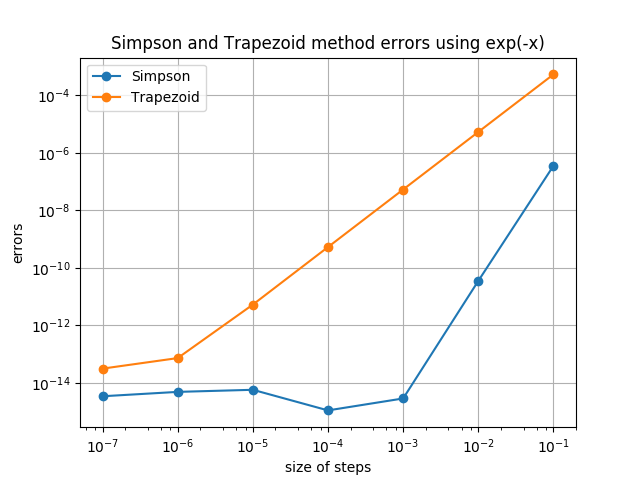

In [24]:
figure()
loglog(1/hh,sim_errors2,"o-",label="Simpson")
loglog(1/hh,trap_errors2,"o-",label='Trapezoid')
title("Simpson and Trapezoid method errors using exp(-x)")
legend()
grid()
xlabel("size of steps")
ylabel("errors")

▶ **CHECKPOINT 2**

## Gaussian quadrature

As we've discussed in class, a more sophisticated method is Gaussian quadrature. We will explore this briefly using our own code, but then move to using precompiled Fortran code provided by the `scipy` package to implement this method.

For two-point Gaussian quadrature from $a$ to $b$, the $x$ values should be
$$
x = a + \left(\frac12 \pm \frac{1}{2\sqrt{3}}\right)(b - a)
$$
each point should have weight $w_i = \frac12$.

**Use two-point Gaussian quadrature to evaluate the same two integrals, $\int_0^{\pi/2}\cos(x)\,\mathrm dx$ and $\int_0^1 \exp(-x)\,\mathrm{d}x$. How close do you get to the correct answers?**

In [ ]:
def Gaussian(function,bounds):
    a, b = bounds
    terms=[(1/2 - 1/(2*sqrt(3))), (1/2 + 1/(2*sqrt(3)))]
    for i in range(len(terms)):
        terms[i] = a + terms[i]*(b-a)
    return sum(terms)*(b-a)    

In [ ]:
Gaussian(cos,(0,pi/2)) 

In [ ]:
Gaussian(lambda x:exp(-x),(0,1)) 

In [ ]:
1-e**(-1)

Now **Import the `quad` function** from the module `scipy.integrate`. **Use the help text** (remember that you can get this by typing `?quad` or `quad?`) to work out how to call this function. (Note that we *don’t* get to choose how many points are evaluated, which will be either 15 or 21 in each subinterval depending on the exact function we use. The price of convenience is complexity!)

**Evaluate the two integrals above once again** and compare the absolute error to the best values obtained by the methods we've discussed so far; to the estimate provided by `quad` itself; and to the machine epsilon.

In [ ]:
from scipy.integrate import quad
?quad
quad(cos,0,pi/2)

In [ ]:
quad(quizf,0,10)

In [ ]:
from sys import float_info
float_info.epsilon

 Very accurate, errors close in magnitude to the machine epsilon

▶ **CHECKPOINT 3**

## Extension: the Romberg correction

We know that Simpson’s rule has an error proportional to $h^4$. Suppose we do two Simpson’s rule calculations, one with step size $h$ and result $S_1$ and another with step size $2h$ and result $S_2$. Then we expect $S_2$ to have $2^4 = 16$ times the error of $S_1$: if $I$ is the true integral, $I - S_2 = 16(I - S_1)$. This suggests a way of improving the calculation: we simply solve for $I$, giving
$$
I = \frac{16S_1 - S_2}{15}.
$$

**Repeat the calculation of errors in known integrals** using the Romberg rule to improve the calculation at each step size, and once again plotting the absolute error against the step size.

In [ ]:
def Romberg(function):
    print("{:^10} {:^10}".format("Step", "Error"))
    hh=logspace(1,7,7)
    rom_errors=[]
    for h in hh:
        x = linspace(0, pi/2, h+1)
        S1=simpson(cos(x),x[1]-x[0])

        x = linspace(0, pi/2, 2*h+1)
        S2=simpson(cos(x),x[1]-x[0])

        Integral=(16*S1 - S2)/15
        rom_error = abs(1- Integral)

        rom_errors.append(rom_error)
        print("{:^10.3e} {:^10.6e}".format(x[1]-x[0],rom_error))

In [ ]:
Romberg(cos)

In [ ]:
Romberg(exp)